In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
cars_data = pd.read_csv('/content/Cardetails_1.csv')

In [ ]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#Exploratory Data Analysis

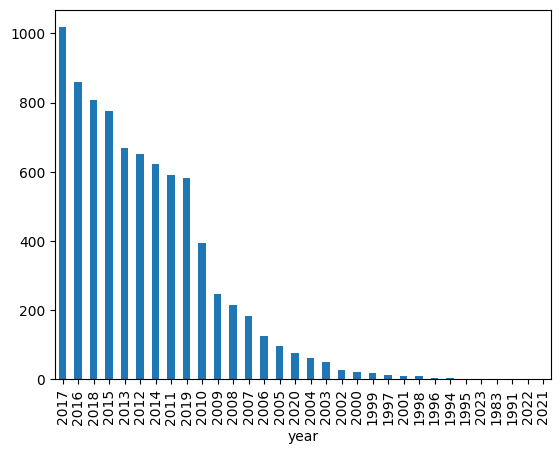

In [140]:
cars_data["year"].value_counts().plot(kind="bar");

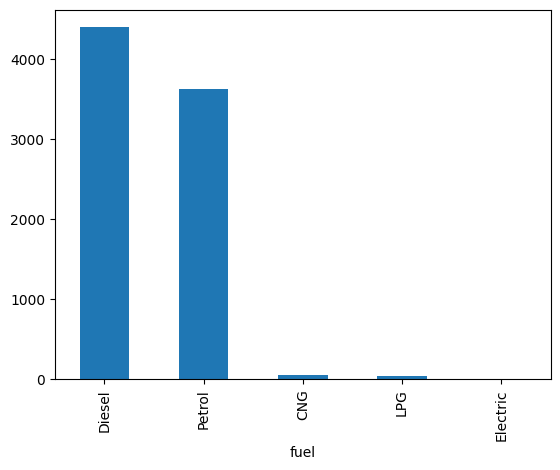

In [141]:
cars_data["fuel"].value_counts().plot(kind="bar");

#preprocessing data

Null Check

In [142]:
cars_data.drop(columns=['torque'], inplace=True)

In [143]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [144]:
cars_data.shape

(8133, 12)

In [145]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [146]:
cars_data.dropna(inplace=True)

In [147]:
cars_data.shape

(7912, 12)

#Duplicate Check

In [148]:
cars_data.duplicated().sum()

1189

In [149]:
cars_data.drop_duplicates(inplace=True)

In [150]:
cars_data.shape

(6723, 12)

In [151]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8128,Hyundai Ioniq 5 RWD,2023,4275000,7500,Electric,Individual,Automatic,First Owner,27 Kmpl,1400 CC,215 bhp,5.0
8129,Hyundai Ioniq 5 RWD,2023,3000000,5000,Electric,Individual,Automatic,First Owner,28.09 kmpl,1400 CC,215,5.0
8130,Hyundai Kona Premium,2022,1895000,17000,Electric,Individual,Automatic,First Owner,30 Kmpl,1298 CC,134 bhp,5.0
8131,Tata Nexon EV XZ Plus,2020,1175000,59200,Electric,Individual,Automatic,First Owner,27 Kmpl,999 CC,127 bhp,5.0


In [152]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6723 entries, 0 to 8132
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6723 non-null   object 
 1   year           6723 non-null   int64  
 2   selling_price  6723 non-null   int64  
 3   km_driven      6723 non-null   int64  
 4   fuel           6723 non-null   object 
 5   seller_type    6723 non-null   object 
 6   transmission   6723 non-null   object 
 7   owner          6723 non-null   object 
 8   mileage        6723 non-null   object 
 9   engine         6723 non-null   object 
 10  max_power      6723 non-null   object 
 11  seats          6723 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.8+ KB


#Data Analysis

In [153]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Hyundai Ioniq 5 RWD'
 'Hyundai Kona Premium' 'Tata Nexon EV XZ Plus']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996 2023
 2022 2021]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000

In [154]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [155]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [156]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [157]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [158]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [159]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [160]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [161]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [162]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996 2023
 2022 2021]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000

In [163]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [164]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [165]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [166]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [167]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [168]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6723 entries, 0 to 8132
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6723 non-null   int64  
 1   year           6723 non-null   int64  
 2   selling_price  6723 non-null   int64  
 3   km_driven      6723 non-null   int64  
 4   fuel           6723 non-null   object 
 5   seller_type    6723 non-null   int64  
 6   transmission   6723 non-null   int64  
 7   owner          6723 non-null   object 
 8   mileage        6723 non-null   float64
 9   engine         6723 non-null   float64
 10  max_power      6723 non-null   float64
 11  seats          6723 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.8+ KB


In [169]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG', 'Electric'], dtype=object)

In [170]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG','Electric'],[1,2,3,4,5], inplace=True)

In [171]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6723 entries, 0 to 8132
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6723 non-null   int64  
 1   year           6723 non-null   int64  
 2   selling_price  6723 non-null   int64  
 3   km_driven      6723 non-null   int64  
 4   fuel           6723 non-null   int64  
 5   seller_type    6723 non-null   int64  
 6   transmission   6723 non-null   int64  
 7   owner          6723 non-null   object 
 8   mileage        6723 non-null   float64
 9   engine         6723 non-null   float64
 10  max_power      6723 non-null   float64
 11  seats          6723 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.8+ KB


In [172]:
cars_data.reset_index(inplace=True)

In [173]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,8128,4,2023,4275000,7500,5,1,2,First Owner,27.00,1400.0,215.00,5.0
6719,8129,4,2023,3000000,5000,5,1,2,First Owner,28.09,1400.0,215.00,5.0
6720,8130,4,2022,1895000,17000,5,1,2,First Owner,30.00,1298.0,134.00,5.0
6721,8131,9,2020,1175000,59200,5,1,2,First Owner,27.00,999.0,127.00,5.0


In [174]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [175]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [176]:
cars_data.drop(columns=['index'], inplace=True)

In [177]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996 2023
 2022 2021]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   

In [178]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [179]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

#Linear Regression

In [180]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [181]:
model = LinearRegression()

#Training using Linear Regression

In [182]:
model.fit(x_train, y_train)

LinearRegression()

#Prediction

In [183]:
predict = model.predict(x_test)


In [184]:
predict

array([-205918.30873702, 1024476.95356581,  784687.40802801, ...,
        713813.2950774 ,  241015.61475261,  167260.75711492])

In [185]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4074,3,2015,94000,1,1,1,2,24.5,1498.0,98.6,7.0


In [186]:
input_data_model = pd.DataFrame(
    [[5,2022,120000,5,1,2,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [187]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,120000,5,1,2,1,12.99,2494.0,100.6,5.0


In [188]:
model.predict(input_data_model)

array([1148954.09322883])

#Random Forest

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size=0.2)

In [192]:
model1=RandomForestRegressor()

#Training using Random Forest

In [193]:
model1.fit(X_train, Y_train)

RandomForestRegressor()

#Prediction

In [194]:
predict1=model.predict(X_test)

In [195]:
predict1

array([340117.95157352, 629844.32329997, 618023.46809389, ...,
       607797.55449051, 425793.76379776, 905899.24214859])

In [196]:
X_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3264,9,2011,148000,1,1,1,2,21.12,1248.0,88.8,5.0


In [197]:
input_data_model1 = pd.DataFrame(
    [[5,2022,120000,5,1,2,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [198]:
input_data_model1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,120000,5,1,2,1,12.99,2494.0,100.6,5.0


In [200]:
model1.predict(input_data_model1)

array([737533.32333333])

#Finding Accuracy of the models

In [208]:
model.score(x_test,y_test)
print("Accuracy of Linear Regression:")
model.score(x_test,y_test)

Accuracy of Linear Regression:


0.6255601915334876

In [209]:
print("Accuracy of Random Forest:")
model1.score(X_test,Y_test)

Accuracy of Random Forest:


0.9227565400708175